In [ ]:
#輸入程式庫

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
import openpyxl
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import roc_curve, auc

In [2]:
data =  pd.read_csv('problem7.csv')
data.head()

,EPS,debt,roa,assets,class
0,8.65,22.75,19.96,4.05,5
1,7.87,61.63,21.31,4.01,5
2,15.10,64.06,13.30,4.00,6
3,0.02,83.34,-0.03,3.48,4
4,5.06,64.66,5.85,3.35,5


In [3]:
data2 = pd.read_csv('problem71.csv')
data2.head()

,no,EPS,debt,roa,assets,class
0,2745,7.87,61.63,21.31,4.01,5
1,8454,15.10,64.06,13.30,4.00,6
2,3048,0.02,83.34,-0.03,3.48,4
3,6776,5.06,64.66,5.85,3.35,5
4,6997,4.60,78.03,6.06,3.21,4


In [4]:
data3=pd.read_csv('problem72.csv')
data3.head()

,no,EPS,debt,roa,asset,class
0,2745,3.11,63.21,5.51,3.77,4
1,8454,3.78,60.02,3.77,3.81,4
2,3048,0.28,80.78,1.12,3.45,4
3,6776,1.07,69.31,1.36,2.97,4
4,6997,1.66,72.76,2.48,2.60,4


In [5]:
print(data)

        EPS   debt    roa  assets  class
0      8.65  22.75  19.96    4.05      5
1      7.87  61.63  21.31    4.01      5
2     15.10  64.06  13.30    4.00      6
3      0.02  83.34  -0.03    3.48      4
4      5.06  64.66   5.85    3.35      5
...     ...    ...    ...     ...    ...
2349  -1.87  10.97 -15.93    0.00      3
2350  -0.11  11.35 -13.11    0.00      3
2351  -1.44   5.64 -14.46    0.00      3
2352  -2.67  16.99 -31.20    0.00      3
2353  -1.18   3.44 -17.24    0.00      3

[2354 rows x 5 columns]


In [6]:
print(data2)
print(data2.shape[0])

        no    EPS   debt    roa  assets  class
0     2745   7.87  61.63  21.31    4.01      5
1     8454  15.10  64.06  13.30    4.00      6
2     3048   0.02  83.34  -0.03    3.48      4
3     6776   5.06  64.66   5.85    3.35      5
4     6997   4.60  78.03   6.06    3.21      4
...    ...    ...    ...    ...     ...    ...
1953  6550  -2.12  16.10 -17.04    0.00      3
1954  1418   0.74  71.61   1.00    0.00      4
1955  4168  -1.65  17.80 -10.95    0.00      3
1956  6492  -3.32   3.39 -19.62    0.00      3
1957  6901  -3.32   1.38 -21.32    0.00      3

[1958 rows x 6 columns]
1958


In [7]:
print(data3)
print(data3.shape[0])

        no   EPS   debt   roa  asset  class
0     2745  3.11  63.21  5.51   3.77      4
1     8454  3.78  60.02  3.77   3.81      4
2     3048  0.28  80.78  1.12   3.45      4
3     6776  1.07  69.31  1.36   2.97      4
4     6997  1.66  72.76  2.48   2.60      4
...    ...   ...    ...   ...    ...    ...
1953  6550 -0.53  16.50 -1.66   0.01      3
1954  1418 -0.65  72.90 -0.78   0.00      3
1955  4168 -0.67  21.17 -4.80   0.02      3
1956  6492 -0.71   2.83 -4.58   0.00      3
1957  6901 -0.95   1.43 -6.39   0.00      3

[1958 rows x 6 columns]
1958


In [8]:
totalsample=data.shape[0]
print(totalsample)

2354


In [9]:
X = data.iloc[:,0:4].values
Y = data['class'].values
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size =0.25,random_state = 0)
X_traino=X_train
X_testo=X_test
Y_traino=Y_train
Y_testo=Y_test

In [10]:
X1=data2.iloc[:,1:5].values
Y1=data2['class'].values

In [11]:
X5=data3.iloc[:,1:5].values
Y2=data3['class'].values

In [12]:
stdscaler = StandardScaler()
X_train = stdscaler.fit_transform(X_train)
X_test = stdscaler.transform(X_test)
X2=stdscaler.fit_transform(X1)
X6=stdscaler.fit_transform(X5)

In [13]:
clf = GaussianNB(var_smoothing=0.0000000001)
clf.fit(X_train,Y_train)

GaussianNB(var_smoothing=1e-10)

In [14]:
y_pred = clf.predict(X_test)
y_proba=clf.predict_proba(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(Y_test, y_pred)
print(cm)

[[  3   1   0   0   0   0   0]
 [  0   4   2   0   0   0   0]
 [  0   7 123  18   0   0   0]
 [  0   0   2 308   5   0   0]
 [  0   0   0   3  70   3   0]
 [  0   0   0   0   2  31   0]
 [  0   0   0   0   0   1   6]]


In [33]:
import openpyxl
wb=openpyxl.Workbook()
y_probab=clf.predict_proba(X2)
y_pred1=clf.predict(X2)
y_proba03=clf.predict_proba(X6)
y_pred2=clf.predict(X6)
j=0
k=0
s1=wb['Sheet']
s1['A1']='EPS_old'
s1['B1']='EPS_new'
s1['C1']='Probability'
s1['D1']='p-value'

for i in Y1:
    if(X1[j][0]>X5[j][0]):
        cl=Y2[j]
        cl1=Y1[j]
        s1.cell(k+1,1).value=X1[j][0]
        s1.cell(k+1,2).value=X5[j][0]
        s1.cell(k+1,3).value=y_probab[j][cl-1]/max(y_probab[j][:])
        s1.cell(k+1,4).value=y_probab[j][cl-1]
                
#        print(X1[j][0],X5[j][0],X1[j][1],X1[j][2],X1[j][3],y_proba03[j][cl-1],y_probab[j][cl-1],cl,y_pred2[j],cl1)
        k+=1
    j=j+1

wb.save('problem7answer.xlsx')

In [34]:
print(clf.score(X_test,Y_test))

0.9252971137521222


In [35]:
from sklearn.metrics import classification_report,accuracy_score
from imblearn.metrics import specificity_score
model_report=classification_report(Y_test,y_pred,digits=3)
print(specificity_score(Y_test,y_pred,average='weighted'))
print(accuracy_score(Y_test,y_pred))
print(cm.diagonal()/cm.sum(axis=1))
print(model_report)

0.9544286599913433
0.9252971137521222
[0.75       0.66666667 0.83108108 0.97777778 0.92105263 0.93939394
 0.85714286]
              precision    recall  f1-score   support

           1      1.000     0.750     0.857         4
           2      0.333     0.667     0.444         6
           3      0.969     0.831     0.895       148
           4      0.936     0.978     0.957       315
           5      0.909     0.921     0.915        76
           6      0.886     0.939     0.912        33
           7      1.000     0.857     0.923         7

    accuracy                          0.925       589
   macro avg      0.862     0.849     0.843       589
weighted avg      0.933     0.925     0.927       589



0.9931910531023874


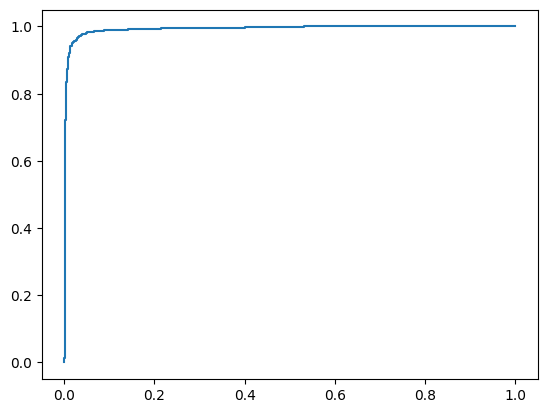

In [36]:
from sklearn.preprocessing import label_binarize
y_true_binarized=label_binarize(Y_test,classes=[1,2,3,4,5,6,7])
n_classes=y_true_binarized.shape[1]
fpr=dict()
tpr=dict()
roc_auc=dict()

roc_auc=dict()
for i in range(n_classes):
    fpr[i],tpr[i],_=roc_curve(y_true_binarized[:,i],np.array(y_proba)[:,i])
    roc_auc[i]=auc(fpr[i],tpr[i])

fpr["micro"],tpr["micro"],_=roc_curve(y_true_binarized.ravel(),np.array(y_proba).ravel())
roc_auc["micro"]=auc(fpr["micro"],tpr["micro"])

print(roc_auc["micro"])
plt.plot(fpr["micro"],tpr["micro"])
df=pd.DataFrame({'fpr':fpr["micro"],'tpr':tpr["micro"]})
df.to_csv("roc1.csv")
plt.show()

In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)
y_pred3=knn.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score
cm3 = confusion_matrix(Y_test, y_pred3)
print(cm3)
model_report=classification_report(Y_test,y_pred3,digits=3)
print(model_report)

[[  0   4   0   0   0   0   0]
 [  0   0   6   0   0   0   0]
 [  0   4 130  14   0   0   0]
 [  0   0   6 306   3   0   0]
 [  0   0   0  18  58   0   0]
 [  0   0   0   0   5  28   0]
 [  0   0   0   0   0   3   4]]
              precision    recall  f1-score   support

           1      0.000     0.000     0.000         4
           2      0.000     0.000     0.000         6
           3      0.915     0.878     0.897       148
           4      0.905     0.971     0.937       315
           5      0.879     0.763     0.817        76
           6      0.903     0.848     0.875        33
           7      1.000     0.571     0.727         7

    accuracy                          0.893       589
   macro avg      0.658     0.576     0.608       589
weighted avg      0.890     0.893     0.890       589



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

0.9816747424725898


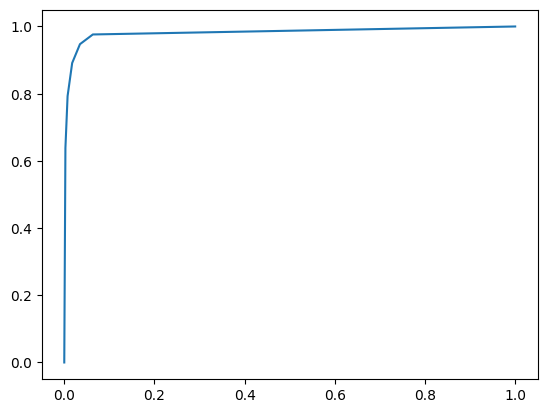

In [38]:
from sklearn.preprocessing import label_binarize
y_proba1=knn.predict_proba(X_test)
y_true_binarized3=label_binarize(Y_test,classes=[1,2,3,4,5,6,7])
n_classes=y_true_binarized.shape[1]
fpr1=dict()
tpr1=dict()
roc_auc1=dict()

roc_auc=dict()
for i in range(n_classes):
    fpr1[i],tpr1[i],_=roc_curve(y_true_binarized3[:,i],np.array(y_proba1)[:,i])
    roc_auc1[i]=auc(fpr1[i],tpr1[i])

fpr1["micro"],tpr1["micro"],_=roc_curve(y_true_binarized3.ravel(),np.array(y_proba1).ravel())
roc_auc1["micro"]=auc(fpr1["micro"],tpr1["micro"])

print(roc_auc1["micro"])
plt.plot(fpr1["micro"],tpr1["micro"])
plt.show()
df=pd.DataFrame({'fpr':fpr1["micro"],'tpr':tpr1["micro"]})
df.to_csv("roc2.csv")

In [39]:
import sklearn.neural_network 
neural_network = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(4,2))
neural_network.fit(X_train, Y_train) 
y_pred10 = neural_network.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score
cm10 = confusion_matrix(Y_test, y_pred10)
from sklearn.metrics import roc_curve, auc
print(cm10)
model_report=classification_report(Y_test,y_pred10,digits=3,zero_division=0)
print(model_report)

[[  0   4   0   0   0   0   0]
 [  0   0   6   0   0   0   0]
 [  0   0 136  12   0   0   0]
 [  0   0   1 314   0   0   0]
 [  0   0   0  16  60   0   0]
 [  0   0   0   0  33   0   0]
 [  0   0   0   0   7   0   0]]
              precision    recall  f1-score   support

           1      0.000     0.000     0.000         4
           2      0.000     0.000     0.000         6
           3      0.951     0.919     0.935       148
           4      0.918     0.997     0.956       315
           5      0.600     0.789     0.682        76
           6      0.000     0.000     0.000        33
           7      0.000     0.000     0.000         7

    accuracy                          0.866       589
   macro avg      0.353     0.386     0.367       589
weighted avg      0.807     0.866     0.834       589



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [40]:
from sklearn.linear_model import LogisticRegression
logistic_classifier = LogisticRegression(solver='saga')
logistic_classifier.fit(X_train, Y_train)
y_pred7 = logistic_classifier.predict(X_test)
print(confusion_matrix(Y_test,y_pred7))
model_report=classification_report(Y_test,y_pred7,digits=3)
print(model_report)

[[  0   2   2   0   0   0   0]
 [  0   0   6   0   0   0   0]
 [  0   3 124  21   0   0   0]
 [  0   0   3 312   0   0   0]
 [  0   0   0  18  58   0   0]
 [  0   0   0   0  11  20   2]
 [  0   0   0   0   0   2   5]]
              precision    recall  f1-score   support

           1      0.000     0.000     0.000         4
           2      0.000     0.000     0.000         6
           3      0.919     0.838     0.876       148
           4      0.889     0.990     0.937       315
           5      0.841     0.763     0.800        76
           6      0.909     0.606     0.727        33
           7      0.714     0.714     0.714         7

    accuracy                          0.881       589
   macro avg      0.610     0.559     0.579       589
weighted avg      0.874     0.881     0.874       589



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-

0.9851604063557217


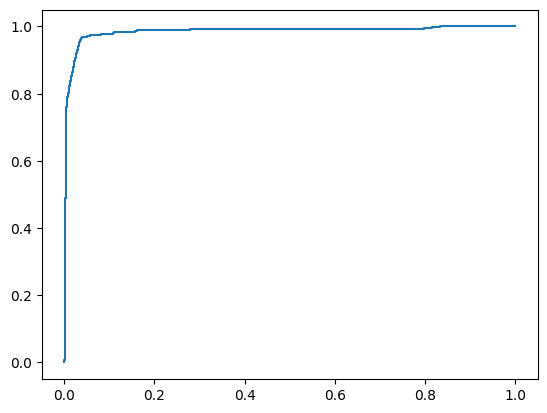

In [41]:
from sklearn.preprocessing import label_binarize
y_proba5=logistic_classifier.predict_proba(X_test)
y_true_binarized5=label_binarize(Y_test,classes=[1,2,3,4,5,6,7])
n_classes=y_true_binarized5.shape[1]
fpr5=dict()
tpr5=dict()
roc_auc5=dict()

roc_auc5=dict()
for i in range(n_classes):
    fpr5[i],tpr5[i],_=roc_curve(y_true_binarized5[:,i],np.array(y_proba5)[:,i])
    roc_auc5[i]=auc(fpr5[i],tpr5[i])

fpr5["micro"],tpr5["micro"],_=roc_curve(y_true_binarized5.ravel(),np.array(y_proba5).ravel())
roc_auc5["micro"]=auc(fpr5["micro"],tpr5["micro"])

print(roc_auc5["micro"])
plt.plot(fpr5["micro"],tpr5["micro"])
plt.show()
df=pd.DataFrame({'fpr':fpr5["micro"],'tpr':tpr5["micro"]})
df.to_csv("roc5.csv")

0.9857186506438065


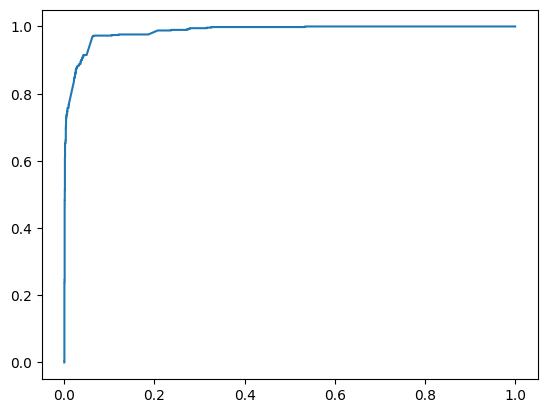

In [42]:
from sklearn.preprocessing import label_binarize
y_proba2=neural_network.predict_proba(X_test)
y_true_binarized2=label_binarize(Y_test,classes=[1,2,3,4,5,6,7])
n_classes=y_true_binarized.shape[1]
fpr2=dict()
tpr2=dict()
roc_auc2=dict()

roc_auc2=dict()
for i in range(n_classes):
    fpr2[i],tpr2[i],_=roc_curve(y_true_binarized2[:,i],np.array(y_proba2)[:,i])
    roc_auc2[i]=auc(fpr2[i],tpr2[i])

fpr2["micro"],tpr2["micro"],_=roc_curve(y_true_binarized2.ravel(),np.array(y_proba2).ravel())
roc_auc2["micro"]=auc(fpr2["micro"],tpr2["micro"])

print(roc_auc2["micro"])
plt.plot(fpr2["micro"],tpr2["micro"])
plt.show()
df=pd.DataFrame({'fpr':fpr2["micro"],'tpr':tpr2["micro"]})
df.to_csv("roc3.csv")